In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#to load dataset of advertising
df=pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#to remove unwanted col Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#to see first 5 values
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#to see null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

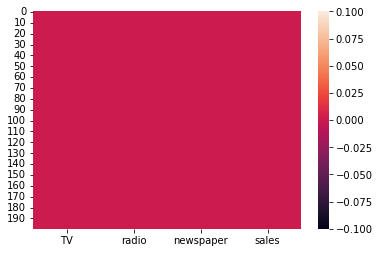

In [6]:
#to see null values visually 
sb.heatmap(df.isnull())
plt.show()

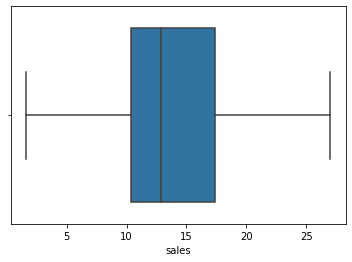

In [7]:
#to see if there's any outlier
sb.boxplot(data=df,x='sales')
plt.show()

In [8]:
#to see the skewness 
df['TV'].skew()

-0.06985336213274573

In [9]:
#to perform modeling
#input to be TV and output to be sales,apply simple linear regression
#to select our input and output
X=df[['TV']] #input to be always 2d 
Y=df['sales'] #output to be always 1d

In [10]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [12]:
#split data into 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
X_train.head()

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4


In [14]:
#to perform Scaling
#apply MinMaxScaler on input variable X
from sklearn.preprocessing import MinMaxScaler
#create an object 
mns=MinMaxScaler()
X_train=mns.fit_transform(X_train)
X_test=mns.transform(X_test)

In [16]:
X_train

array([[0.46838011],
       [0.4687183 ],
       [0.01589449],
       [0.99053094],
       [0.94927291],
       [0.02705445],
       [0.26885357],
       [0.46398377],
       [0.76597903],
       [0.10415962],
       [0.88603314],
       [0.71964829],
       [0.97024011],
       [0.03719986],
       [0.05816706],
       [0.70645925],
       [0.07811972],
       [0.25600271],
       [0.84612783],
       [0.47548191],
       [0.63273588],
       [0.45180927],
       [0.80858979],
       [0.75515725],
       [0.25295908],
       [0.32735881],
       [0.25228272],
       [0.02603991],
       [0.64389584],
       [0.58978695],
       [0.45485289],
       [0.90023673],
       [0.2874535 ],
       [0.46939466],
       [0.57693608],
       [0.63307406],
       [0.12681772],
       [0.59621238],
       [0.12614136],
       [0.56712885],
       [0.05478526],
       [0.80047345],
       [0.09435238],
       [0.66587758],
       [0.0557998 ],
       [0.67095029],
       [0.65099763],
       [0.946

In [18]:
len(X),len(Y)

(200, 200)

In [20]:
#to perform simple linear regression lets import LinearRegression
from sklearn.linear_model import LinearRegression

In [22]:
#to create an object for LinearRegression
lr=LinearRegression()

In [24]:
#to train the model,use fit() method 
lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
#check slope/gradient/coefficient , use coef_
m=lr.coef_
print('Slope: ',m)

Slope:  [14.22968771]


In [28]:
#to check intercept , we use intercept_
c=lr.intercept_
print('Intercept: ',c)

Intercept:  6.957204965199124


In [30]:
#testing model with 30% data X_test
#we use inbuilt method predict() of lr 
Y_pred=lr.predict(X_test)
Y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

In [34]:
#to compare Y_test with Y_pred , create a dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
#convert into df
df1=pd.DataFrame(dict)
df1.head()

,Actual Output,Predicted Output
58,23.8,17.067646
40,16.6,16.668233
34,9.5,11.528799
102,14.8,20.407316
184,17.6,19.136894


In [40]:
#evaluation of model 
#find mse
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print('mean_squared_error : ',mse)

mean_squared_error :  10.571057434656955


In [42]:
#to find root_mean_squared_error
rmse=np.sqrt(mse)
print('root_mean_squared_error : ',rmse)

root_mean_squared_error :  3.251316261863333


In [44]:
#to check accuracy , we use r2_score
from sklearn.metrics import r2_score
print("r2_score : ",r2_score(Y_test,Y_pred))

r2_score :  0.575061860494331


In [45]:
#we can see its near to just above 0.5 , so model is ubderfit and just average ,as the score should be more towards 1